<a href="https://colab.research.google.com/github/JunetzMasihBelajar/2025_ComputerVision_TI2B/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1 : Memulai Klasifikasi Gambar dengan Dataset Sederhana

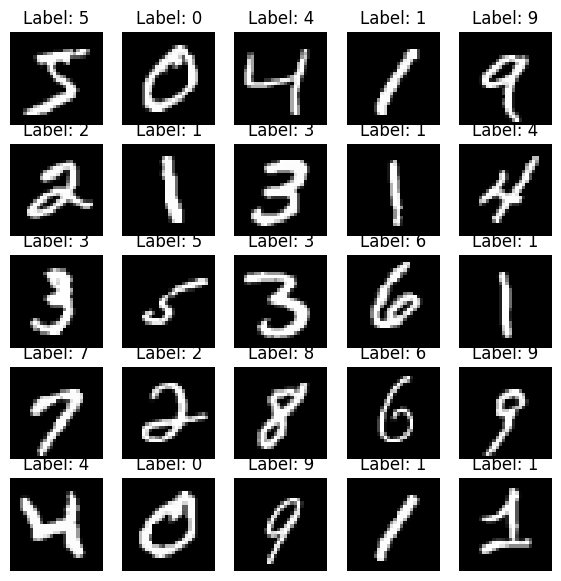

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2 : Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [2]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Praktikum D3 : Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.8926 - loss: 0.3414 - val_accuracy: 0.9838 - val_loss: 0.0530
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9831 - loss: 0.0540 - val_accuracy: 0.9890 - val_loss: 0.0382
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9894 - loss: 0.0351 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9892 - val_loss: 0.0355


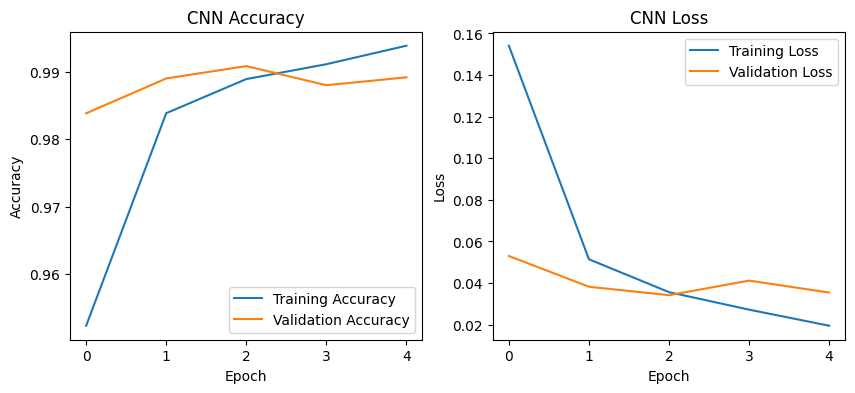

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D4 : Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.2909 - loss: 1.9055 - val_accuracy: 0.5150 - val_loss: 1.3567
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.4738 - loss: 1.4599 - val_accuracy: 0.5938 - val_loss: 1.1957
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5319 - loss: 1.3151 - val_accuracy: 0.6328 - val_loss: 1.0888
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5612 - loss: 1.2187 - val_accuracy: 0.6438 - val_loss: 1.0549
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5854 - loss: 1.1695 - val_accuracy: 0.6530 - val_loss: 0.9783
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6062 - loss: 1.1045 - val_accuracy: 0.6744 - val_loss: 0.9619
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6253 - loss: 1.0593 - val_accuracy: 0.6734 - val_loss: 0.9481
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6424 -

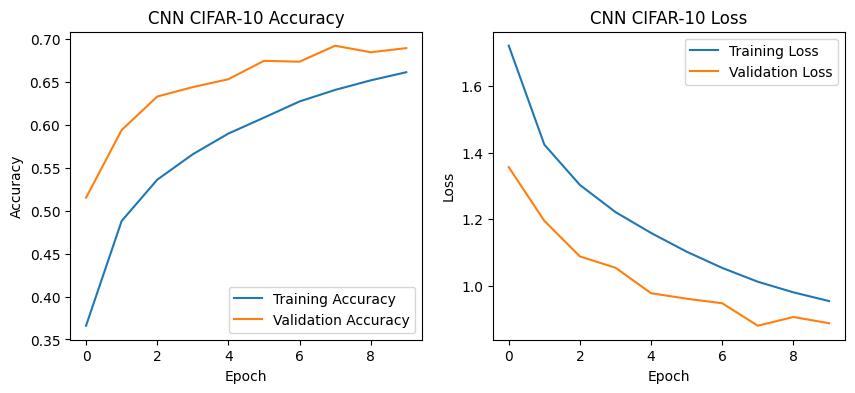

In [31]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D5 : Transfer Learning dengan Model Pra-Latih

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 524s 372ms/step - accuracy: 0.4583 - loss: 1.5492 - val_accuracy: 0.5766 - val_loss: 1.2159
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 560s 370ms/step - accuracy: 0.5764 - loss: 1.2113 - val_accuracy: 0.5870 - val_loss: 1.1834
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 554s 394ms/step - accuracy: 0.6036 - loss: 1.1424 - val_accuracy: 0.6056 - val_loss: 1.1378
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 583s 413ms/step - accuracy: 0.6354 - loss: 1.0443 - val_accuracy: 0.6418 - val_loss: 1.0327
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 653s 435ms/step - accuracy: 0.6725 - loss: 0.9422 - val_accuracy: 0.6546 - val_loss: 1.0009
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 622s 435ms/step - accuracy: 0.6928 - loss: 0.8802 - val_accuracy: 0.6650 - val_loss: 0.9778
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 435ms/step - accuracy: 0.7034 - loss: 0.8464 - val_accuracy: 0.6638 - val_loss: 0.9662
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 434ms/step - accuracy: 

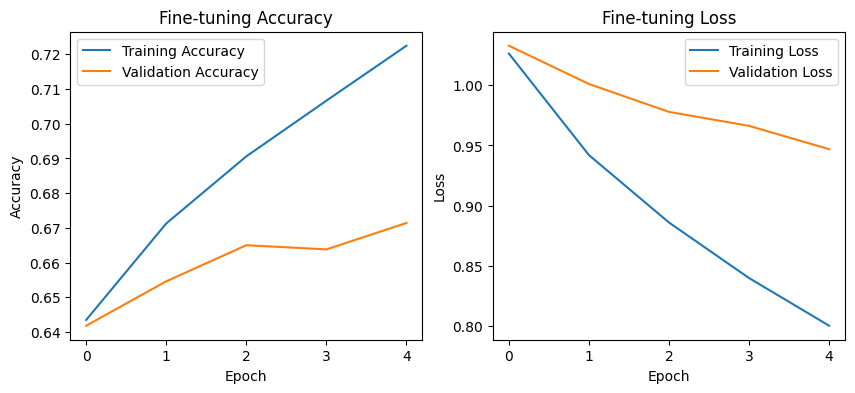

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# ===== Transfer Learning (awal) =====
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih classifier dulu
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# ===== Fine-tuning 1–2 layer terakhir =====
base_model.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False   # hanya 2 layer terakhir yang dilatih

# Re-compile dengan learning rate kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih ulang dengan fine-tuning
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history setelah fine-tuning =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-tuning Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-tuning Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()


# Praktikum D6 : Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 334ms/step
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1000
           1       0.72      0.62      0.67      1000
           2       0.54      0.53      0.53      1000
           3       0.45      0.38      0.41      1000
           4       0.52      0.57      0.54      1000
           5       0.55      0.52      0.53      1000
           6       0.52      0.79      0.62      1000
           7       0.72      0.57      0.64      1000
           8       0.74      0.72      0.73      1000
           9       0.62      0.61      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



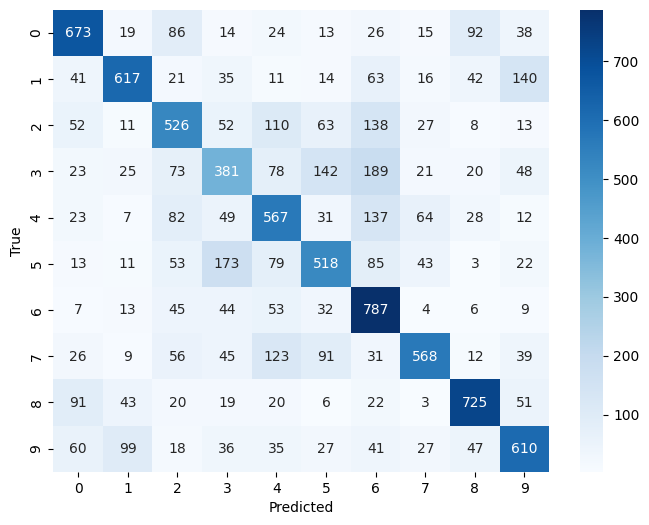

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Penugasan

## Pre-processing

In [19]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas- hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  -	Konversi ke grayscale
  -	Auto-contrast
  -	(Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
  -	Crop ke bounding box digit
  -	Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  -	Normalisasi ke [0,1] dan tambah axis channel """
  # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)

  arr = np.array(img).astype(np.uint8)
  # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28, 28), color=0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0

  # Tambah channel dim (28,28,1
  arr = arr[..., None]
  return canvas, arr


Saving angka - Copy.jpg to angka - Copy (1).jpg


## Prediksi dengan CNN (Pilihan A)

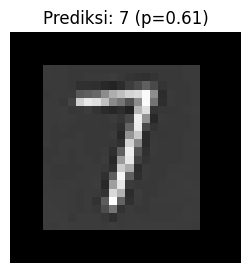

Rekap Prediksi (CNN):
- angka - Copy (1).jpg -> 7 (p=0.606)


In [21]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)    # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)             # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]    # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
